Task 4. Проведите Explorative Data Analysis знаменитого датасэта титаника (или какого-нибудь другого, если вам скушно с Титаником). Нужны корреляции, графики распределений

In [160]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt

In [8]:
titanic = pd.read_csv("https://stepik.org/media/attachments/course/4852/titanic.csv")

In [148]:
titanic['Sex_bul'] = titanic['Sex'].map({'male': 0,'female': 1})

In [166]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_bul,Age_full
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,35.0


In [167]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
Sex_bul          int64
Age_full       float64
dtype: object

In [170]:
women = titanic[titanic.Sex == "female"]
men = titanic[titanic.Sex != "female"]

# Determine the proportion of women who survived
proportion_women_survived = round((float(len(women[women.Survived == 1])) / len(women))*100, 1)
print('The percent of women who survived is %s.' % proportion_women_survived)

# Determine the proportion of men who survived
proportion_men_survived = round((float(len(men[men.Survived == 1])) / len(men))*100,2)
print('The percent of men who survived is %s.' % proportion_men_survived)

The percent of women who survived is 74.2.
The percent of men who survived is 18.89.


Выжило почти 3/4 женщин и менее пятой части мужчин

In [113]:
Location = titanic.groupby(['Embarked', "Pclass"]).agg({'Embarked' : ['count']})

In [114]:
Location

Embarked
                   count
Embarked Pclass         
C        1            85
         2            17
         3            66
Q        1             2
         2             3
         3            72
S        1           127
         2           164
         3           353

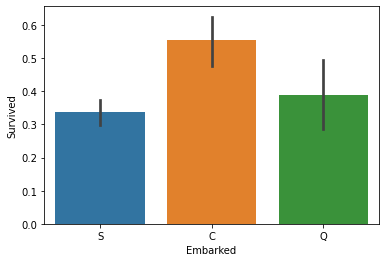

In [112]:
sns.barplot(data=titanic, x='Embarked', y='Survived')

Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
Большинство пассажиров село в Саутгемптоне, и большинство из них были пассажирами третьего класса, поэтому доля погибших среди них больше. Наименьшая доля пассажиров, севших в Шербурге, погибла, т.к. среди них многие были пассажирами первого класса

In [64]:
numb_in_clsses = titanic[['Pclass','PassengerId']].groupby(['Pclass']).agg('count')

In [65]:
numb_in_clsses

,PassengerId
Pclass,
1,216
2,184
3,491


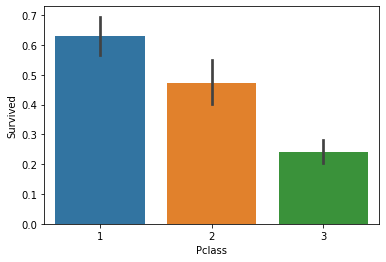

In [68]:
sns.barplot(data=titanic, x='Pclass', y='Survived')

In [71]:
survive_in_classes = titanic[['Pclass', 'Sex', 'Survived', 'PassengerId']].groupby(['Pclass', 'Sex', 'Survived'])\
    .agg('count')

In [72]:
survive_in_classes

PassengerId
Pclass Sex    Survived             
1      female 0                   3
              1                  91
       male   0                  77
              1                  45
2      female 0                   6
              1                  70
       male   0                  91
              1                  17
3      female 0                  72
              1                  72
       male   0                 300
              1                  47

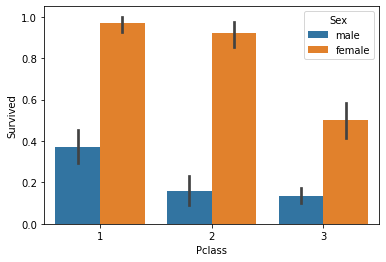

In [70]:
sns.barplot(data=titanic, x='Pclass', y='Survived', hue = 'Sex')

Из графиков и расчетов выше видно, что максимальная доля выживших приходится на пассажиров первого класса. В каждом классе выжило значительно больше женщин, чем мужчин

In [82]:
Ages = titanic[['Pclass', 'Sex', 'Survived', 'PassengerId', 'Age']]\
                    .groupby(['Pclass', 'Sex', 'Survived']).agg({'Age' : ['min', 'mean', 'median',  'max']})

In [83]:
Ages

Age                        
                          min       mean median   max
Pclass Sex    Survived                               
1      female 0          2.00  25.666667   25.0  50.0
              1         14.00  34.939024   35.0  63.0
       male   0         18.00  44.581967   45.5  71.0
              1          0.92  36.248000   36.0  80.0
2      female 0         24.00  36.000000   32.5  57.0
              1          2.00  28.080882   28.0  55.0
       male   0         16.00  33.369048   30.5  70.0
              1          0.67  16.022000    3.0  62.0
3      female 0          2.00  23.818182   22.0  48.0
              1          0.75  19.329787   19.0  63.0
       male   0          1.00  27.255814   25.0  74.0
              1          0.42  22.274211   25.0  45.0

c:\users\ekaterina\miniconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\ekaterina\miniconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


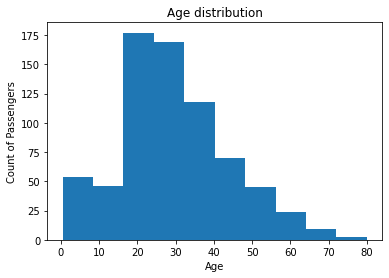

In [86]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(titanic['Age'], bins = 10, range = (titanic['Age'].min(),titanic['Age'].max()))
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Count of Passengers')
plt.show()

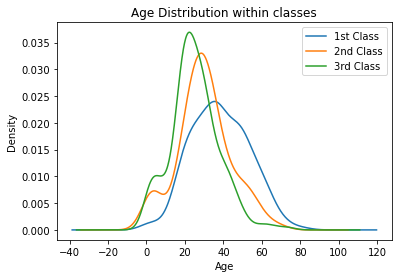

In [118]:
titanic.Age[titanic.Pclass == 1].plot(kind='kde')    
titanic.Age[titanic.Pclass == 2].plot(kind='kde')
titanic.Age[titanic.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

На Титанике было довольно много детей и очень много молодых людей (ехавших преимущественно в третьем классе); в первом классе пассажиры отличались более пожилым возрастом по сравнению в двумя другими классами

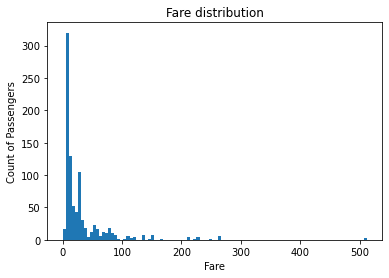

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(titanic['Fare'], bins = 100, range = (titanic['Fare'].min(),titanic['Fare'].max()))
plt.title('Fare distribution')
plt.xlabel('Fare')
plt.ylabel('Count of Passengers')
plt.show()

Большая часть билетов были дешевыми

In [122]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [124]:
titanic[['Survived', 'Pclass']].corr()

,Survived,Pclass
Survived,1.000000,-0.338481
Pclass,-0.338481,1.000000


Подтверждается отрицательная зависимость между классом и возможностью выжить, но зависимость слабая, это, скорее всего, обосновывается тем, что спасали в основном женщин независимо от класса

In [177]:
Fem=titanic.query('Sex_bul == 1')
Fem[['Survived', 'Pclass']].corr() # посчитаем ту же корреляцию только для женцин

,Survived,Pclass
Survived,1.000000,-0.477114
Pclass,-0.477114,1.000000


Все-таки выше вероятность выжить у женщин из более высокого класса; для мужчин связь значительно слабже (см. ниже)

In [178]:
Men=titanic.query('Sex_bul == 0')
Men[['Survived', 'Pclass']].corr() # посчитаем ту же корреляцию только для мужчин

,Survived,Pclass
Survived,1.000000,-0.220618
Pclass,-0.220618,1.000000


In [132]:
titanic[['Survived', 'Pclass', 'Sex_bul', 'Age', 'Fare']].corr()

,Survived,Pclass,Sex_bul,Age,Fare
Survived,1.000000,-0.338481,0.543351,-0.077221,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.369226,-0.549500
Sex_bul,0.543351,-0.131900,1.000000,-0.093254,0.182333
Age,-0.077221,-0.369226,-0.093254,1.000000,0.096067
Fare,0.257307,-0.549500,0.182333,0.096067,1.000000


Здесь мы снова видим, что чем ниже класс, тем больше молодых людей в нем; пол и класс довольно сильно положительно скоррелированы; класс и цена довольно сильно скоррелированы (логично, ага)

In [ ]:
titanic["Age_full"] = titanic["Age"].fillna(titanic["Age"].median()) # заполним пропущенные возраста 
                                                            # медианными значениями (в отдельной переменной)

In [163]:
X = titanic[["Pclass", "Sex_bul", "Age_full", "Fare"]]
y  = titanic["Survived"]

In [165]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.463206
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.304     
Dependent Variable: Survived         AIC:              833.4325  
Date:               2020-04-05 18:03 BIC:              852.6019  
No. Observations:   891              Log-Likelihood:   -412.72   
Df Model:           3                LL-Null:          -593.33   
Df Residuals:       887              LLR p-value:      5.5403e-78
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Pclass        -0.6417    0.0678  -9.4682  0.0000  -0.7745  -0.5089
Sex_bul        2.6138    0.1803  14.5004  0.0000   2.2605   2.

Мы построили логистическую регрессию, в которой предсказали возможность выжить от класса пассажиров, пола, возраста и цены билета. Все объясняющие переменные значимы. Результат согласуется с полученными ранее выводами: женщины чаще выживают, чем мужчины, с ростом возраста вероятность выжить снижается, чем ниже класс и выше стоимость билета, тем вероятнее, что пассажир выживет.

Воизбежании мультиколинеарности, оставим только одну из двух скоррелированных переменных (а именно, класс оставим, цену билета уберем)

In [184]:
Z = titanic[["Pclass", "Sex_bul", "Age_full"]]
logit_model2=sm.Logit(y,Z)
result2=logit_model2.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.467963
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.297     
Dependent Variable: Survived         AIC:              839.9107  
Date:               2020-04-05 18:36 BIC:              854.2877  
No. Observations:   891              Log-Likelihood:   -416.96   
Df Model:           2                LL-Null:          -593.33   
Df Residuals:       888              LLR p-value:      2.5264e-77
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Pclass       -0.6764    0.0668  -10.1226  0.0000  -0.8073  -0.5454
Sex_bul       2.6874    0.1762   15.2538  0.0000   2.3421   3.

Переменная возраст стала незначима
Проверим, если уберем класс и добавим цену

In [183]:
U = titanic[[ "Fare", "Sex_bul", "Age_full"]]
logit_model3=sm.Logit(y,U)
result3=logit_model3.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.522082
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.216     
Dependent Variable: Survived         AIC:              936.3509  
Date:               2020-04-05 18:35 BIC:              950.7279  
No. Observations:   891              Log-Likelihood:   -465.18   
Df Model:           2                LL-Null:          -593.33   
Df Residuals:       888              LLR p-value:      2.2092e-56
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
              Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
------------------------------------------------------------------
Fare          0.0093    0.0021    4.3474  0.0000   0.0051   0.0136
Sex_bul       2.1166    0.1693   12.5001  0.0000   1.7847   2.

Интересно, что цена билета - теперь значимый предиктор